In [23]:
import json

In [24]:
import csv

In [25]:
import numpy as np

In [26]:
import pandas as pd

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
from sklearn import svm

In [31]:
from sklearn import metrics

In [32]:
import pickle

In [33]:
from sklearn import naive_bayes

In [34]:
from IPython.display import Image

In [35]:
from sklearn.model_selection import StratifiedKFold

In [36]:
from sklearn import ensemble

In [37]:
from sklearn import tree

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
import scikitplot as skplt

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
vocab_file='../vocabulary/4.csv'

In [43]:
label_file='../vocabulary/label-file1.csv'

In [44]:
df= pd.read_csv(vocab_file)

In [45]:
df2=pd.read_csv(label_file)

In [46]:
print(df.shape)
print(df2.shape)

(1000, 7053)
(1000, 1)


In [47]:
print(df.values)

[[    0.     0.     0. ...     0.     0.   758.]
 [    0.     0.     0. ...     0.     0.   760.]
 [    0.     0.     0. ...     0. 40299.   740.]
 ...
 [    0.     0.     0. ...     0. 82758.   742.]
 [    0.     0.     0. ...     0. 82758.   746.]
 [    0.     0.     0. ...     0. 82758.   760.]]


In [48]:
df2

,news-label
0,not spam
1,not spam
2,not spam
3,not spam
4,not spam
5,not spam
6,not spam
7,not spam
8,not spam
9,not spam


In [49]:
label_dict={'not spam': 1, 'spam': 0}
df2['news-label']= df2['news-label'].map(label_dict)
y=df2['news-label']
print(y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: news-label, Length: 1000, dtype: int64


In [50]:
x= df
print(x)

     0 1 percent  000s of servers  1 11 percent  1 4 year  1 5 hours  10 days  \
0           0.00              0.0          0.00       0.0        0.0      0.0   
1           0.00              0.0          0.00       0.0        0.0      0.0   
2           0.00              0.0          0.00       0.0        0.0      0.0   
3           0.00              0.0          0.00       0.0        0.0      0.0   
4           0.00              0.0          0.00       0.0        0.0      0.0   
5           0.00              0.0          0.00       0.0        0.0      0.0   
6           0.00              0.0          0.00       0.0        0.0      0.0   
7           0.00              0.0          0.00       0.0        0.0      0.0   
8           0.33              0.0          0.33       0.0        0.0      0.0   
9           0.00              0.0          0.00       0.0        0.0      0.0   
10          0.00              0.0          0.00       0.0        0.0      0.0   
11          0.00            

In [51]:
from sklearn.decomposition import PCA
pca=PCA(1000)
A=df.values
pca.fit(A)
print(pca.components_)
B = pca.transform(A)
print(B)

[[-2.20843077e-09 -1.27107708e-08 -2.20843100e-09 ... -3.81791765e-04
   9.99999854e-01 -5.26810234e-06]
 [-3.97699340e-07 -7.48403636e-07 -3.97699341e-07 ...  7.07104362e-01
   5.39947295e-04  2.50766538e-03]
 [-3.85259566e-05  5.66403421e-05 -3.85259566e-05 ...  1.77169263e-03
  -3.87423755e-06 -9.99892762e-01]
 ...
 [ 4.58974066e-03  5.13828404e-03  8.40848155e-02 ... -3.82072516e-17
   6.73880922e-18  2.11528414e-15]
 [ 2.62647159e-04  8.14595492e-04  1.90329223e-02 ... -4.07125011e-17
   3.00747858e-18 -1.29782818e-15]
 [-9.02751618e-04 -3.38891657e-02 -3.49443455e-03 ... -4.80508019e-17
   1.95187772e-18 -1.17086017e-15]]
[[-2.43957248e+04 -3.84779619e+01 -5.78192670e+00 ... -1.85877474e-13
  -1.40958436e-13 -4.11178897e-14]
 [-2.43957248e+04 -3.84729413e+01 -7.78235680e+00 ... -1.40945971e-13
  -1.48216737e-13 -5.67213377e-14]
 [ 1.59032694e+04 -1.67635836e+01  1.20731472e+01 ...  8.29522133e-14
   1.04351437e-13  4.04671922e-14]
 ...
 [ 5.83622632e+04  6.16690022e+00  9.8962900

In [ ]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
A=df.values
#print(A)
M=mean(A.T, axis=1)
#print(M)
C=A-M
#print(C)
V= cov(C.T)
#print(V)
values, vectors= eig(V)
#print(values)
#P= vectors.T.dot(C.T)
#print(P.T)

In [82]:
values

array([0.10722373+0.j, 0.05852379+0.j, 0.0539077 +0.j, ...,
       0.        +0.j, 0.        +0.j, 0.        +0.j])

In [83]:
P=vectors.T.dot(C.T)


In [ ]:
print(P.T)
x=P.T

In [40]:
from sklearn.decomposition import PCA
x=df
pca= PCA(n_components=1000)
#pca=PCA(n_components == min(n_samples, n_features))
#X_reduced = PCA(n_components='mle').fit_transform(x)
pca.fit(x)
print(pca.n_components_)
print(pca.singular_values_) 
print(pca.explained_variance_ratio_) 

1000
[9.39004843e+05 4.86203216e+03 2.99665093e+02 2.42052816e+02
 1.55866807e+01 1.01105575e+01 7.60893250e+00 7.32131033e+00
 6.06158474e+00 5.96269519e+00 5.88805562e+00 5.64356254e+00
 5.48632979e+00 5.44604754e+00 5.34675676e+00 5.11118248e+00
 5.07693413e+00 4.97428332e+00 4.94676251e+00 4.87499017e+00
 4.78720417e+00 4.76734863e+00 4.69151668e+00 4.64132836e+00
 4.55782369e+00 4.53119930e+00 4.52018163e+00 4.48134882e+00
 4.45332342e+00 4.38823709e+00 4.35252913e+00 4.31004370e+00
 4.29989010e+00 4.28371704e+00 4.26880085e+00 4.23621188e+00
 4.20840875e+00 4.19304321e+00 4.16617851e+00 4.12644802e+00
 4.09211023e+00 4.05854636e+00 4.05293966e+00 4.04978020e+00
 4.03250381e+00 4.01103947e+00 3.97902167e+00 3.96419819e+00
 3.95667177e+00 3.93996136e+00 3.91673205e+00 3.89482499e+00
 3.87751147e+00 3.84732646e+00 3.83198368e+00 3.81818738e+00
 3.81271389e+00 3.79282820e+00 3.78138415e+00 3.75985522e+00
 3.74348539e+00 3.72993379e+00 3.71907233e+00 3.70207378e+00
 3.68097641e+00 3.6

AttributeError: 'PCA' object has no attribute 'shape'

In [38]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25)

In [41]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
y_probas = nb.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas)

NameError: name 'x_train' is not defined

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'x_train' is not defined

In [86]:
nb=MultinomialNB()

In [87]:
nb.fit(x_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.552


pandas.core.series.Series

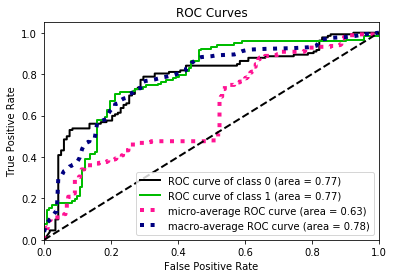

In [103]:
y_pred= nb.predict_proba(x_test)
#print(y_pred)
#accuracy=metrics.accuracy_score(y_test, y_pred)
print(accuracy)
skplt.metrics.plot_roc(y_test, y_pred)
#print(y_pred.shape)
#A = np.squeeze(np.asarray(y_test))
#print(A.type)
type(y_pred)
type(y_test)
#skplt.metrics.plot_precision_recall_curve(A, y_pred)
#print(y_test.value[1:5])

In [89]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(A[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


ValueError: classes [0 1] missmatch with the labels [0 1 2]found in the data

In [90]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

KeyError: 2

<Figure size 432x288 with 0 Axes>

(199,)
(199,)


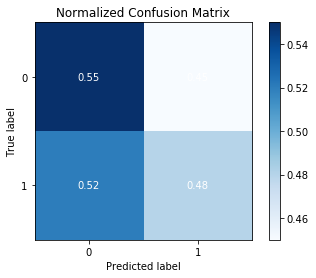

In [87]:
print(y_test.shape)
print(y_pred.shape)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
#plt.show()

In [54]:
accuracy=metrics.accuracy_score(y_test, y_pred)

IndexError: too many indices for array

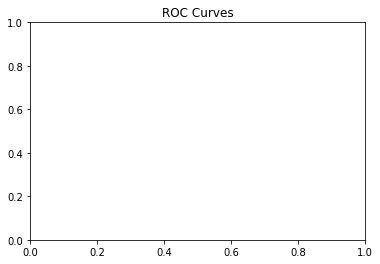

In [76]:
#skplt.metrics.plot_roc(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_pred)

In [73]:
np.concatenate((1-y_pred,y_pred),axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [89]:
print(y_test.shape)
print(y_pred.shape)

(199,)
(199,)


In [88]:
#np.concatenate((1-y_pred,y_pred),axis=1)
#skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
#plt.suptitle('SVM Classifier TF', fontsize=16)
plt.show()

C:\Users\Zoya Ch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


IndexError: too many indices for array

In [40]:
print(accuracy*100)

51.75879396984925


In [30]:

import scikitplot as skplt

In [44]:
from sklearn.preprocessing import StandardScaler
x=df.values
print(x.shape)
t=y
print(t.shape)
x=StandardScaler().fit_transform(x)
print(x)
pca= Yahan sy karna

(1000, 7092)
(1000,)
[[ 0.          0.          0.         ... -0.8215732   0.75749203
   0.26207923]
 [ 0.          0.          0.         ... -0.8215732   1.0183364
   0.26207923]
 [ 0.          0.          0.         ...  0.53557258 -1.59010724
  -0.05431421]
 ...
 [ 0.          0.          0.         ...  1.96546049 -1.32926288
  -0.15977868]
 [ 0.          0.          0.         ...  1.96546049 -0.80757415
  -0.15977868]
 [ 0.          0.          0.         ...  1.96546049  1.0183364
  -0.37070764]]


In [68]:
#x.shape
df=pd.DataFrame(x)
print(df)

                         0                         1     \
0     (24395.724800808777+0j)    (38.47796190176412+0j)   
1       (24395.7248113986+0j)     (38.4729412994569+0j)   
2    (-15903.269415264846+0j)     (16.7635835726244+0j)   
3     (24395.724742964478+0j)    (38.50553780625293+0j)   
4     (10225.726866814832+0j)   (30.826897478182687+0j)   
5    (-53232.263877243146+0j)   (-3.439594584584502+0j)   
6      (445.7282819952843+0j)   (25.551234327286554+0j)   
7     (-67482.26180967657+0j)  (-11.128835120042758+0j)   
8      (5900.727506229945+0j)   (28.488954077065905+0j)   
9     (-44295.26523252562+0j)   (1.4109849931283498+0j)   
10    (-8002.270465351264+0j)   (20.979710793720123+0j)   
11    (445.72827672254147+0j)   (25.553746910344344+0j)   
12    (24395.724669334806+0j)       (38.54064747914+0j)   
13    (-53232.26388254165+0j)  (-3.4370765394425895+0j)   
14   (-15903.269373008776+0j)   (16.743501253938216+0j)   
15    (24395.724773358572+0j)   (38.492795132911276+0j) 

In [53]:
from sklearn.metrics import f1_score

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Support Vector Machine
Accuracy score is :           79.10379009475237
Micro precision score is:           79.10379009475237
Macro precision score is:           81.64799095425737
Weighted precision score is:        81.66795236765616
Recall score is:              93.1878787878788
F1 score is:              79.10379009475237


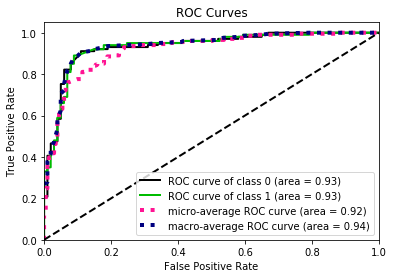

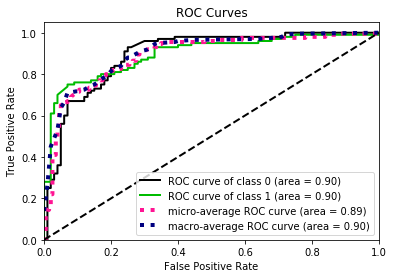

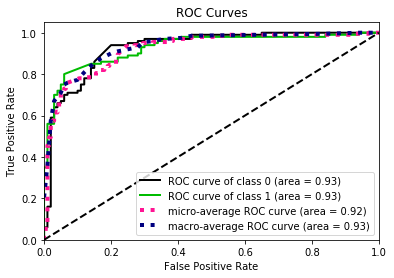

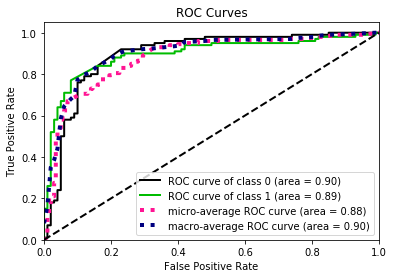

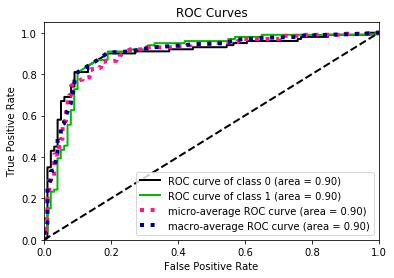

In [55]:
df=pd.DataFrame(B) 
accuracy_sum=0

precision_micro_sum=0
precision_macro_sum=0
precision_weighted_sum=0

recall_sum=0
f1_sum=0

clf= svm.SVC(C=0.5,gamma=0.1,probability=True)
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    
    accuracy=metrics.accuracy_score(y_test, y_pred)
    #precision_macro=metrics.precision_score(y_test,y_pred, average='macro')
    
    recall= metrics.recall_score(y_test, y_pred)
    
    precision_micro=metrics.precision_score(y_test,y_pred, average='micro')
    precision_micro_sum=precision_micro_sum+precision_micro
    precision_macro=metrics.precision_score(y_test,y_pred, average='macro')
    precision_macro_sum=precision_macro_sum+precision_macro
    precision_weighted=metrics.precision_score(y_test,y_pred, average='weighted')
    precision_weighted_sum=precision_weighted_sum+precision_weighted
    
    recall_sum= recall_sum+recall
    
    accuracy_sum=accuracy_sum+accuracy
    f1=f1_score(y_test, y_pred, average='micro')
    f1_sum=f1_sum+f1
    y_pred= clf.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, y_pred)
    
    
    

accuracy_average= accuracy_sum/5
precision_micro_average=precision_micro_sum/5
precision_macro_average=precision_macro_sum/5
precision_weighted_average=precision_weighted_sum/5

recall_average=recall_sum/5
f1_avg=f1_sum/5

print('Support Vector Machine')
print('Accuracy score is :          ',accuracy_average*100)

print('Micro precision score is:          ',precision_micro_average*100)
print('Macro precision score is:          ',precision_macro_average*100)
print('Weighted precision score is:       ',precision_weighted_average*100)

print('Recall score is:             ',recall_average*100)
print('F1 score is:             ',f1_avg*100)

#df.iloc[train_index]

In [39]:
df=x
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= MultinomialNB()
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    y_pred= clf.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, y_pred)
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Multinomial Naive Bayes Classifier')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Logistic Regression: 
Accuracy score is :           82.36321658041452
precision score is:           85.2216387046305
Recall score is:              78.0969696969697
82.36321658041452


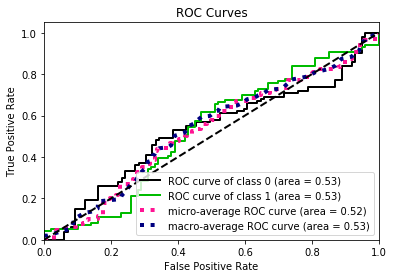

In [94]:
accuracy_sum=0

precision_sum=0
recall_sum=0
pred_sum=[]
clf= LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    y_pred= clf.predict_proba(x_test)
    
    
    #skplt.metrics.plot_roc(y_test, y_pred)
    
y_pred= clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred)    

accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Logistic Regression: ')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Gradient Boosting Classifier: 
Accuracy score is :           89.79538738468463
precision score is:           93.91042678251982
Recall score is:              85.16969696969696
89.79538738468463


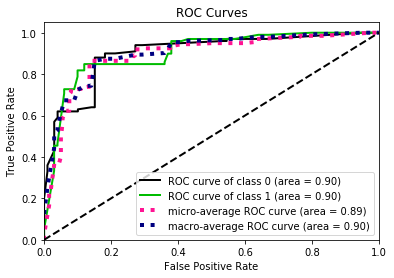

In [46]:
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= ensemble.GradientBoostingClassifier()
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
y_pred= clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred)
print('Gradient Boosting Classifier: ')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

In [58]:
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Random Forest Classifier: ')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Random Forest Classifier: 
Accuracy score is :           79.58419210480263
precision score is:           81.73174470457079
Recall score is:              75.1010101010101
79.58419210480263


In [59]:
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= DecisionTreeClassifier(random_state=0)
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    recall= metrics.recall_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Decision Tree Classifier: ')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Decision Tree Classifier: 
Accuracy score is :           89.69539238480962
precision score is:           90.79864519558917
Recall score is:              88.36969696969697
89.69539238480962


In [34]:
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    nb.fit(x_train, y_train)
    y_pred=nb.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    
    
    
    

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


NameError: name 'nb' is not defined

In [35]:
accuracy_sum=0

precision_sum=0
recall_sum=0
clf= MultinomialNB()
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    #print(accuracy)
    accuracy_sum=accuracy_sum+accuracy
    precision_sum=precision_sum+precision
    recall_sum= recall_sum+recall
    
    

    
accuracy_average= accuracy_sum/5
precision_average=precision_sum/5
recall_average=recall_sum/5
print('Multinomial Naive Bayes Classifier')
print('Accuracy score is :          ',accuracy_average*100)
print('precision score is:          ',precision_average*100)
print('Recall score is:             ',recall_average*100) 
accuracy_average= accuracy_sum/5    
print(accuracy_average*100)  
#df.iloc[train_index]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Multinomial Naive Bayes Classifier
Accuracy score is :           50.63095238095238
precision score is:           81.81818181818181
Recall score is:              75.0
50.63095238095238
